In [1]:
import os, sys

sys.path.append(os.path.abspath("Datasets"))
sys.path.append(os.path.abspath("Images"))

### Support vector machine
<img src="Images/6_1_Problem.JPG" height="450">
- How we can define a boundary to classify them?
- But there are a lot of lines we can create. So the problem is to find the optimal line.
- We want the line to have the Maximum Margin
<img src="Images/6_2_maximum_margin.JPG" height="450">
- Therefore, we call those 2 points are the support vectors for this algorithm:
<img src="Images/6_3_support_vectors.JPG" height="450">
- We call them support vectors, not points because in multi-dimensional space, we can only see them as a vector, not a point anymore. The problem we call them support vectors is because when we remove other points, the algorithm will not change, only the "Support Vectors" contribute to the model. 
- The line is called **Maximum Margin Hyperplane**, or Maximum Margin Classifier. 
- Condition: The dataset must be linearly separable.
#### What's so special about SVMs?
- How to teach the machine to distinguish Apple and Orange?
- Given: Dataset with labels
- Other algorithms: The machine will try to learn the most specific types of Apple (red, usual shape...) and then try to predict if a new one coming. And same for Orange (orange, usual shape...). As we look at the image below, it will learn the Apples and Oranges far away from the other.
<img src="Images/6_4_others.JPG" height="450">
- Support Vector Machine: it's different. It will look at the Apple which is very much the same as a Orange, and the Orange look the most like an Apple:
<img src="Images/6_5_svm.JPG" height="450">
- SVM is a more extreme machine, which look at a more extreme case. So it's very special and different from the others. 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
dataset = pd.read_csv("Datasets/ML_a_z/Social_Network_Ads.csv")

In [4]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0


In [5]:
X = dataset.iloc[:, 2:-1].values
y = dataset.iloc[:, -1].values

In [6]:
# Split test and training set
from sklearn.cross_validation import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                   test_size=0.25,
                                                   random_state=0)

In [8]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [9]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [26]:
# Create an SVM classifier
from sklearn.svm import SVC
classifier = SVC(kernel="linear", random_state=0)

In [27]:
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [28]:
y_pred = classifier.predict(X_test)

In [29]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [30]:
cm

array([[63,  5],
       [ 7, 25]])

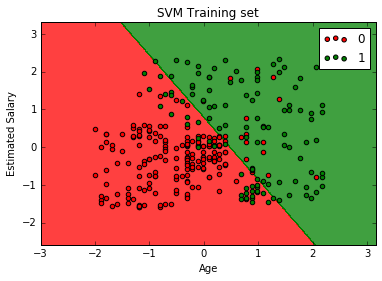

In [31]:
# Visualize
from matplotlib.colors import ListedColormap

X_set, y_set = X_train, y_train
X1 = X_set[:, 0]
X2 = X_set[:, 1]
X1, X2 = np.meshgrid(np.arange(X1.min()-1, X1.max()+1, 0.01),
                    np.arange(X2.min()-1, X2.max()+1, 0.01))
X_plot = np.array([X1.ravel(), X2.ravel()])
y_plot = classifier.predict(X_plot.T).reshape(X1.shape)
plt.contourf(X1, X2, y_plot, alpha=0.75, 
             cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j, 0], X_set[y_set==j, 1],
               c=ListedColormap(('red', 'green'))(i), label=j)
plt.title("SVM Training set")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.legend()

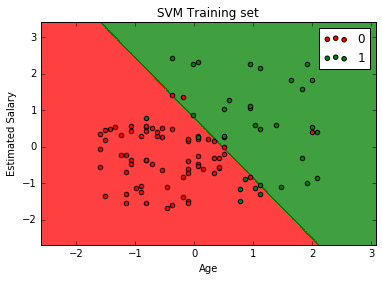

In [32]:
# Visualize
from matplotlib.colors import ListedColormap

X_set, y_set = X_test, y_test
X1 = X_set[:, 0]
X2 = X_set[:, 1]
X1, X2 = np.meshgrid(np.arange(X1.min()-1, X1.max()+1, 0.01),
                    np.arange(X2.min()-1, X2.max()+1, 0.01))
X_plot = np.array([X1.ravel(), X2.ravel()])
y_plot = classifier.predict(X_plot.T).reshape(X1.shape)
plt.contourf(X1, X2, y_plot, alpha=0.75, 
             cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j, 0], X_set[y_set==j, 1],
               c=ListedColormap(('red', 'green'))(i), label=j)
plt.title("SVM Training set")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.legend()